In [233]:
import pandas as pd
import numpy as np
from datetime import datetime


In [2]:
#reading IRI file
df = pd.read_csv("data/raw/IRI_EA.tsv",sep="\t")

In [ ]:
import glob
filenames = glob.glob("data/raw/*")
for f in filenames:
    df = pd.read_csv(f)
    print("###########################")
    print(f)
    print(np.shape(df))
    print(df.head(1))

In [4]:
indices = {
    'AO': {
        'name': 'Arctic Oscilation',
        'raw_file': "AO.csv",
        'format': 'monthly'
    },
    'NAO': {
        'name': 'North Atlantic Oscillation',
        'raw_file': 'NAO.csv',
        'format': 'monthly'
    }
}

In [5]:
formats = {
    'monthly': {
        'sep': '\t',
        'header': None,
        'missing_value': None
    }
}

In [6]:
sep, header, missing = formats[indices['AO']['format']]

In [ ]:
pd.read_fwf(r'data/raw/IRI_SCA.tsv',sep='\t')

In [ ]:
pd.read_fwf(r'data/raw/AO.csv',sep='\t',header=None)

In [ ]:
pd.read_fwf(r'data/raw/AMO.csv',sep='\t',header=None)

In [ ]:
pd.read_fwf(r'data/raw/AMO.csv',sep='\t',header=None)

### Arctic Oscillation (AO)

In [15]:
df = pd.read_fwf(r'data/raw/AO.csv',sep='\t',header=None)
df.columns = ['year','month','AO']
df.to_csv("data/filtered/AO.csv",sep=";",index=False)

### North Atlantic Oscillation (NAO) and friends

Important: 
- data/raw/NAO.csv is NAO data
- data/raw/IRI_NAO.csv is the same data, but standarized using 1981-2010 baseline

Will be using the standarized version

In [ ]:
datei = pd.to_datetime('1960-01', format='%Y-%m')
indexes = ['EA','EAWR','EPNP','NAO','PNA','POL','SCA','TNH','WP']
for i in indexes:
    print(i)
    df = pd.read_fwf(r'data/raw/IRI_{}.tsv'.format(i),sep='\t')
    df.columns = ['month',i]
    df['month'] = np.floor(df['month'])


    df['date'] = df['month'].apply(lambda m: datei + pd.DateOffset(months=m))
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df.drop(['date'],axis=1,inplace=True)
    print(np.max(df[i]),np.min(df[i]))
    df.to_csv("data/filtered/{}.csv".format(i),sep=";",index=False)


EA
3.67 -3.33
EAWR
4.03 -4.17
EPNP
3.88 -2.96
NAO
3.06 -3.14
PNA
2.87 -3.65
POL
3.53 -3.44
SCA
3.15 -2.69
TNH
2.2 -3.26
WP
3.39 -3.45


In [187]:
filenames = glob.glob("data/raw/*")
for f in filenames:
    print(f)

data/raw\AMO.csv
data/raw\AO.csv
data/raw\ersst5_nino.csv
data/raw\GBI.csv
data/raw\IRI_EA.tsv
data/raw\IRI_EAWR.tsv
data/raw\IRI_EPNP.tsv
data/raw\IRI_NAO.tsv
data/raw\IRI_PNA.tsv
data/raw\IRI_POL.tsv
data/raw\IRI_SCA.tsv
data/raw\IRI_TNH.tsv
data/raw\IRI_WP.tsv
data/raw\NAO.csv
data/raw\NINO_1_2.csv
data/raw\NINO_4.csv
data/raw\ONI.csv
data/raw\PDO.csv
data/raw\PDO_source_2.csv
data/raw\PNA.csv
data/raw\QBO.csv
data/raw\tele_index.csv


#### Atlantic Multi-decadal Oscillation (AMO)

In [209]:
df = pd.read_fwf(r'data/raw/AMO.csv',sep='\t',header=None,na_values=99.990)
df = df.melt(id_vars=0)
df.columns = ['year','month','AMO']
df = df.dropna()
df = df.sort_values(by=['year','month'])
df.to_csv("data/filtered/AMO.csv",sep=";",index=False)

#### Greenland Blocking Index (GBI)

In [246]:
df = pd.read_csv(r'data/raw/GBI.csv',sep=',',header=None,na_values=-9999.000)
df
#df = df.melt(id_vars=0)
df.columns = ['date','GBI']    
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df = df.dropna()
df.drop(['date'],axis=1,inplace=True)
df = df.sort_values(by=['year','month'])
df.to_csv("data/filtered/GBI.csv",sep=";",index=False)

#### ONI

In [251]:
df = pd.read_fwf(r'data/raw/ONI.csv',sep='\t',header=None,na_values=-99.90)
df = df.melt(id_vars=0)
df.columns = ['year','month','ONI']
df = df.dropna()
df = df.sort_values(by=['year','month'])
df.to_csv("data/filtered/ONI.csv",sep=";",index=False)

PDO

In [256]:
df = pd.read_fwf(r'data/raw/PDO_source_3.csv',sep='\t',header=None,na_values=[-9999.000,99])
df = df.melt(id_vars=0)
df.columns = ['year','month','PDO']
df = df.dropna()
df = df.sort_values(by=['year','month'])
df.to_csv("data/filtered/PDO.csv",sep=";",index=False)

#### QBO

In [261]:
df = pd.read_fwf(r'data/raw/QBO.csv',sep='\t',header=None,na_values=[-999.00,99])
df = df.melt(id_vars=0)
df.columns = ['year','month','QBO']
df = df.dropna()
df = df.sort_values(by=['year','month'])
df
df.to_csv("data/filtered/QBO.csv",sep=";",index=False)

#### ENSO

In [296]:
df=pd.read_csv(r'data/raw/ersst5_nino.csv',sep='\t',header=None,skipinitialspace=False,skiprows=1)
df_split = df[0].str.split(expand=True)
df_split.columns = ["year","month", "NINO1_2","NINO1_2_ANOM","NINO3","NINO3_ANOM","NINO4","NINO4_ANOM","NINO3_4","NINO3_4_ANOM"]
df_split = df_split.dropna()
df_split.to_csv("data/filtered/ENSO.csv",sep=";",index=False)

#### Merging all index

In [306]:
import glob
# List of CSV files (you can change this to your actual list of file paths)
csv_files = glob.glob("data/filtered/*")
# Create an empty DataFrame to start the merging process
merged_df = None

# Loop through each CSV file
for file in csv_files:
    # Read the current CSV file
    df = pd.read_csv(file,sep=";")
    
    # Ensure the 'year' and 'month' columns exist and are used for merging
    if 'year' in df.columns and 'month' in df.columns:
        if merged_df is None:
            # Initialize the first DataFrame
            merged_df = df
        else:
            # Merge with the existing merged_df on 'year' and 'month'
            merged_df = pd.merge(merged_df, df, on=['year', 'month'], how='outer')
    else:
        print(f"Skipping {file} because it does not contain 'year' and 'month' columns")

# Optionally, you can save the merged DataFrame to a new CSV file
#merged_df.to_csv('merged_output.csv', index=False)

# Display the merged DataFrame
print(merged_df)

      year  month  AMO      AO    EA  EAWR  NINO1_2  NINO1_2_ANOM  NINO3  \
0     1851      1  NaN     NaN   NaN   NaN      NaN           NaN    NaN   
1     1851      2  NaN     NaN   NaN   NaN      NaN           NaN    NaN   
2     1851      3  NaN     NaN   NaN   NaN      NaN           NaN    NaN   
3     1851      4  NaN     NaN   NaN   NaN      NaN           NaN    NaN   
4     1851      5  NaN     NaN   NaN   NaN      NaN           NaN    NaN   
...    ...    ...  ...     ...   ...   ...      ...           ...    ...   
2081  2024      6  NaN  0.1364  1.32 -2.32    22.17         -0.95  26.35   
2082  2024      7  NaN  0.5868  2.39 -0.41    21.18         -0.78  25.67   
2083  2024      8  NaN  1.2836  3.67 -0.25    20.58         -0.43  24.83   
2084  2024      9  NaN -0.6237  1.26 -3.38    19.98         -0.75  24.71   
2085  2024     10  NaN  0.5248  0.97 -1.35    20.67         -0.35  24.81   

      NINO3_ANOM  ...   GBI   NAO   ONI    PDO   PNA   POL    QBO   SCA  TNH  \
0      

In [307]:
df = merged_df.dropna()
df.to_csv("data/ready/all_indices.csv",sep=";",index=False)

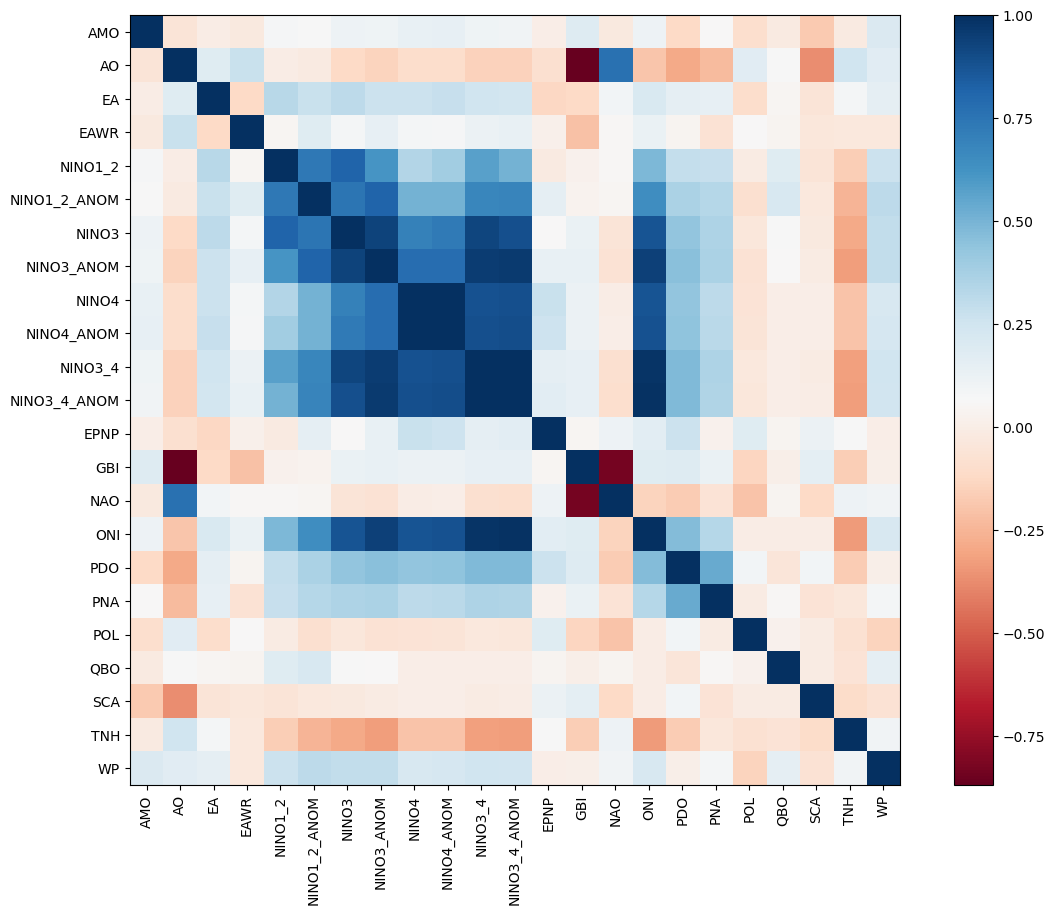

In [309]:
corr_matrix = df.drop(columns=["year","month"]).corr()
number = range(0,len(corr_matrix))
labels = corr_matrix.columns

import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))
plt.imshow(corr_matrix,cmap="RdBu")
plt.colorbar()
plt.xticks(number,labels,rotation='vertical')
plt.yticks(number,labels,rotation='horizontal')
plt.show()